## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Importing data

In [ ]:
data = pd.read_csv("C:\\Users\\hp\\Downloads\\IRIS.csv")
print(data)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


## Basic Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Data Cleaning

## Empty cells

In [4]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Check Duplicates

In [5]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  3


## Plotting Boxplot

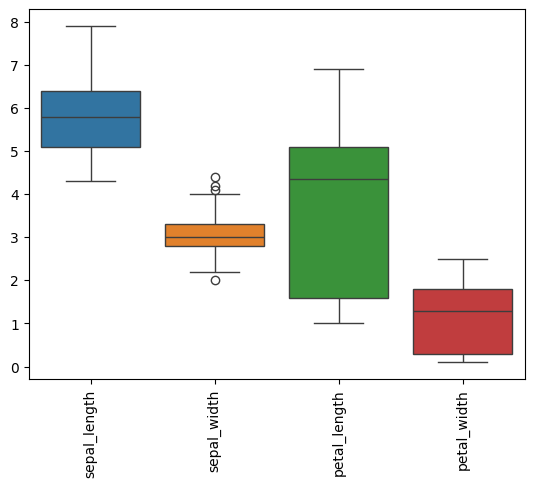

In [6]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## Encoding Categorial Data

In [7]:
categ_col = data.select_dtypes(include=['object']).columns

# Initialize encoders
label_encoder = LabelEncoder()

# Encode each categorical column using Label Encoding for simplicity
encoded_data = data.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(data[i])

# Display the first 5 rows of the encoded dataset
print(encoded_data)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


## Extract Dependent and Independent Variables

In [8]:
X = encoded_data.iloc[:,0:4]   #Independent variable
y = encoded_data['species']     #dependent variable

## ## Statistical Analysis
### (Correlation,Describe) 

In [9]:
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


              sepal_length  sepal_width  petal_length  petal_width  species
sepal_length         1.000       -0.109         0.872        0.818    0.783
sepal_width         -0.109        1.000        -0.421       -0.357   -0.419
petal_length         0.872       -0.421         1.000        0.963    0.949
petal_width          0.818       -0.357         0.963        1.000    0.956
species              0.783       -0.419         0.949        0.956    1.000


<Axes: >

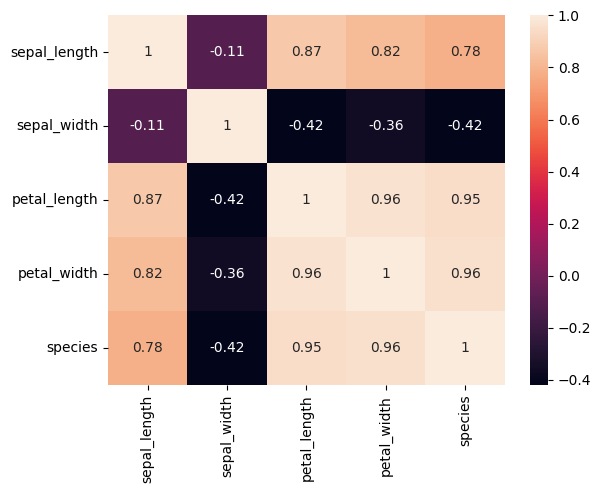

In [10]:
correlation=encoded_data.corr(numeric_only=True)
print(np.around(correlation,decimals=3))
sns.heatmap(correlation,annot=True)

## Split Train and Test Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [12]:
# Fitting the MLR model to the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set result
y_pred = model.predict(X_test)

# To compare the actual output values for X_test with the predicted value
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(data)

     Actual  Predicted
73        1   1.230517
18        0  -0.040888
118       2   2.221623
78        1   1.349720
76        1   1.286079
31        0   0.023466
64        1   1.057962
141       2   1.825570
68        1   1.372193
82        1   1.068988
110       2   1.699768
12        0  -0.072570
36        0  -0.154762
9         0  -0.065135
19        0  -0.023202
56        1   1.395244
104       2   1.999392
69        1   1.049702
55        1   1.280405
132       2   1.973154
29        0   0.031343
127       2   1.597756
26        0   0.094199
128       2   1.918215
131       2   1.830263
145       2   1.880026
108       2   1.789192
143       2   2.032572
45        0   0.037307
30        0   0.026433


In [13]:
# predicting the accuracy score
score = r2_score(y_test,y_pred)
print("r2 score is ", score*100,"%")

r2 score is  94.67245149351709 %
